In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)


# Assuming your images are stored in 'train' and 'test' directories in Google Drive
train_dir = '/content/gdrive/My Drive/train'
test_dir = '/content/gdrive/My Drive/test'



# Image Data Generator with Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

# Flow validation images in batches of 32 using test_datagen generator
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

# ConvNet model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=2,
                    validation_data=test_generator,
                    validation_steps=len(test_generator))


Mounted at /content/gdrive
Found 1808 images belonging to 2 classes.
Found 42 images belonging to 2 classes.
Epoch 1/2
57/57 [==============================] - 164s 3s/step - loss: 0.1491 - accuracy: 0.9640 - val_loss: 0.8005 - val_accuracy: 0.7381
Epoch 2/2
57/57 [==============================] - 135s 2s/step - loss: 0.1076 - accuracy: 0.9784 - val_loss: 1.3682 - val_accuracy: 0.7381


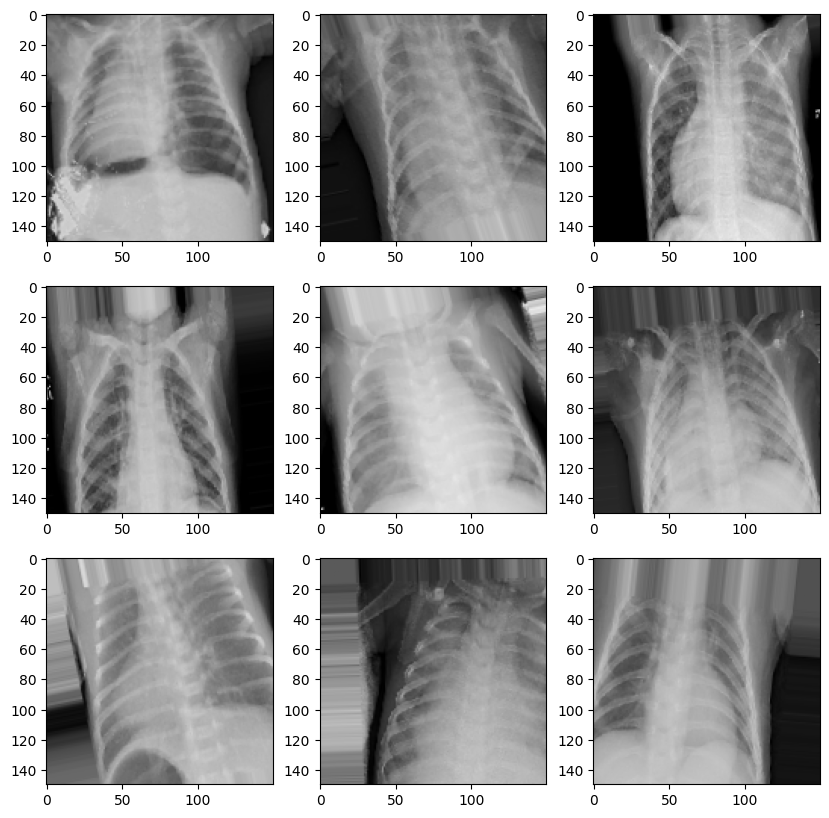

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the train_generator
x_batch, y_batch = next(train_generator)

# Create a grid of images
plt.figure(figsize=(10,10))
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_batch[i])
plt.show()


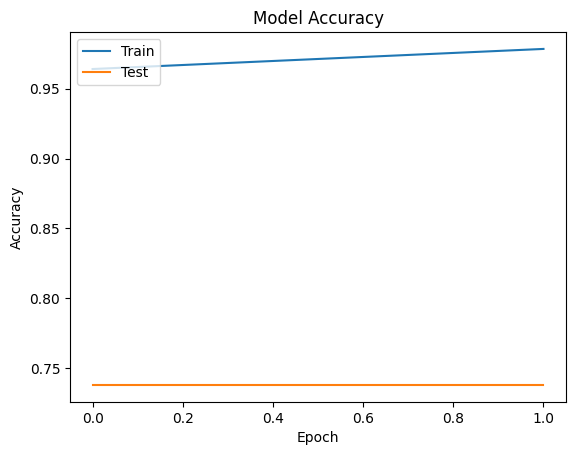

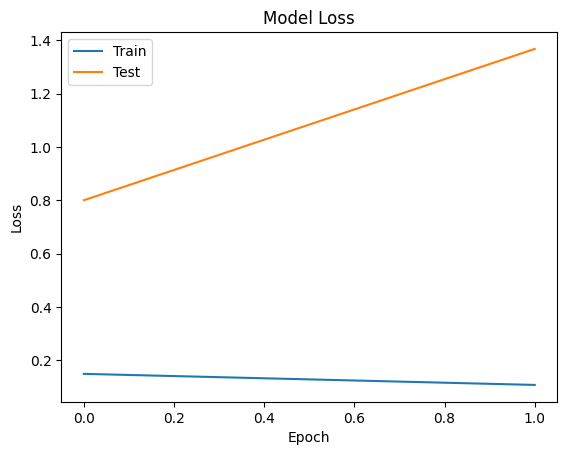

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# evaluate the model
scores = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make predictions on the test data
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)

# if the model is binary classification and output layer is sigmoid
predictions = [1 if x > 0.5 else 0 for x in predictions]

# print first 10 predictions
print('First 10 predictions: ', predictions[:10])


2/2 [==============================] - 1s 149ms/step - loss: 1.3682 - accuracy: 0.7381
Test loss: 1.3681840896606445
Test accuracy: 0.738095223903656
2/2 [==============================] - 1s 142ms/step
First 10 predictions:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
